In [2]:
# 기본적인 임포트
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# 사이킷 런이 지원하는 유방암 데이터셋 가져오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer( )

In [15]:
# 훈련 데이터 세트를 x와 y에 저장
x = cancer.data
y = cancer.target

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=42)

# 일반적인 신경망

일반적으로 신경망은 입력층, 은닉층, 출력층으로 구성된다.  
앞서 배운 로지스틱 회귀는 은닉층이 없는 신경망이라고 할 수 있다.  
  
은닉층과 출력층에는 활성화 함수가 붙어있다.  
  
  </br>

## 단일층 신경망 구현

앞서 만든 LogisticNeruon 클래스를 가져온 다음 이름을  
singleLayer로 바꾼뒤 코드를 수정해주자  
  
기존 코드에 경사하강법 등의 기능을 추가할 것이다.

In [22]:
# 지난번에 만든 코드
class SingleLayer:
  def __init__(self):                 
    self.w = None
    self.b = None
    self.losses = []                  # 손실함수의 결과값을 저장할 리스트 추가
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   
    return z

  def backprop(self, x, err):
    w_grad = x * err                 
    b_grad = 1 * err                 
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))  # 인덱스를 섞는다.
      for i in indexes:                       # 모든 샘플에 대해 반복
        z = self.forpass(x[i])              # 정방향 계산
        a = self.activation(z)              # 활성화 함수 적용
        err = -(y[i] - a)                   # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)   # 역방향 계산
        self.w -= w_grad                                # 가중치 업데이트
        self.b -= b_grad                                # 절편 업데이트
        # 안전한 로그 계산을 위해 클리핑 한 후 손실을 누적
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))  # 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))

  # 시그모이드 함수
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
    return np.array(z) > 0                  # 계단함수 적용

  def score(self, x, y):            # 정확도를 계산해주는 메서드
    return np.mean(self.predict(x) == y)

# 여러 가지 경사 하강법
  
지금까지 경사하강법은 샘플 1개에 대한 그레이디언트(손실함수의 변화율)을 계산했다.  
이를 확률적 경사 하강법이라고 한다.  
  
전체 훈련세트를 사용해 한 번에 그레이디언트를 계산하는 방식인 배치 경사 하강법과  
배치 크기를 작게하여(훈련 세트를 여러번 나눠서) 처리하는 미니 배치 경사 하강법이 있다.  
</br>




확률적 경사하강법은 데이터 하나하나 그레이디언트를 계산한다.  
때문에 계산 비용은 적지만 최적값에 수렴하는 과정이 불안정하다.
</br>  
배치 경사 하강법은 전체 훈련 데이터 세트를 한 번에 사용해  
그레이디언트를 계산하기에 최적값 수렴과정이 안정적이지만  
계산비용이 높다.  




아무튼 이제 단일층 신경망 클래스가 완성되었다.  
이 코드를 유방암 데이터 세트에 적용해보자

# 단일층 신경망 훈련
이제 앞서 만든 SingleLayer 클래스로 객체를 만들고  
훈련세트로 이 신경망을 훈련한 다음  
정확도를 출력해보자

In [23]:
layer = SingleLayer( )
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-22-3f2cb2f9d8aa>:42: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9385964912280702

정확도가 훨씬 좋다.  
정확도가 좋아진 이유는 에포크마다 훈련세트를 섞어 손실함수의 값을  
줄였기 때문이다.  
손실함수 누적값을 확인해보자

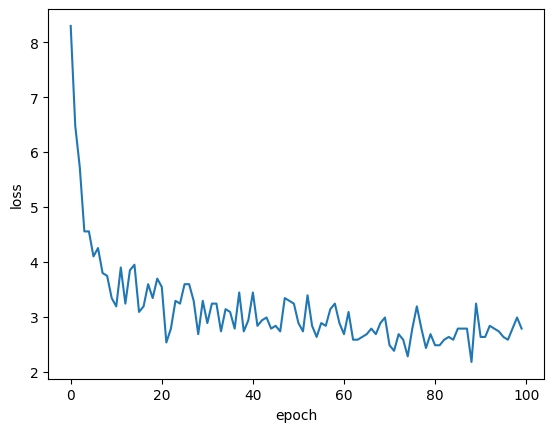

In [24]:
# 손실함수 누적값 확인
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
# 사이킷런으로 로지스틱 회귀 수행하기
사이킷런의 경사하강법 클래스는 SGDClassifier이다.  

In [25]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

이제 훈련하고 평가해보자

In [26]:
# 훈련 및 평가
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

테스트 세트에서 10개의 샘플을 뽑아서 예측을 만들어보자

In [27]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])